In [99]:
# Basics of Deep Learning using Keras


In [100]:
#DIFFERENT TYPES OF NEURAL NETWORK-

# ANN - Artificial Neural Network
# CNN - Convolutional Neural Network
# RNN - Recurrent Neural Network
# LSTM - Long Short Term Memory

In [101]:
#FORWARD FEED NETWORK-

#neurons
#weights
#bias
#dense layer

In [102]:
#ACTIVATION FUNCTION-

#sigmoid function
#linear function
#relu
#softmax function

In [103]:
#LOSS FUNCTION-

#mean square error
#binary cross entrohy
#categorical cross entrophy
#sparse categorical cross entrophy

In [104]:
#BACK PROPAGATION-

#epochs
#keras api
#gradient descent
#adam

In [105]:
#KERAS-

#it is an API designed for humans not machine
#built on tensorflow2
#industry strength framework
#it offers consistent and simple apis, provides clear n actionable error msgs
#extensive documentation n developer guides

In [106]:
#MACHINE LEARNING-

#algo based on stastical techniques
#manual feature engg is done
#trained on cpu hardware
#accuracy plateaus after a certain point

In [107]:
#DEEP LEARNING-

#focuses on logical structure called NN inspired by human brain
#nn creates its own features
#it is data driven need gpus
#performance increases as data increases

In [108]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [109]:
from tensorflow import keras
keras.__version__

'2.12.0'

In [110]:
#activation fuction
#sigmoid


In [111]:
#s(x)= 1/ (1+e^-x)

In [112]:
#1. using numpy

In [113]:
import numpy as np
import matplotlib.pyplot as plt

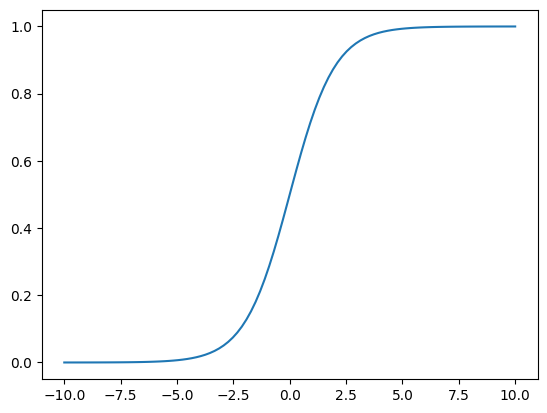

In [114]:
x=np.linspace(-10,10,100)
z=1/(1+np.exp(-x))
plt.plot(x,z)
plt.show()

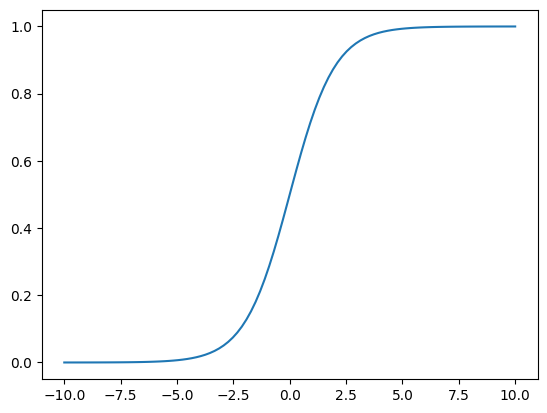

In [115]:
import tensorflow as tf
x=np.linspace(-10,10,100)
z=tf.keras.activations.sigmoid(x)
plt.plot(x,z)
plt.show()

In [116]:
#ANN REGRESSION-

In [117]:
import tensorflow as tf

In [118]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path="boston_housing.npz", test_split=0.2, seed=113)

In [119]:
x_train.shape

(404, 13)

In [120]:
x_test.shape

(102, 13)

In [121]:
import pandas as pd
df = pd.DataFrame(x_train)
df['Target'] = y_train
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Target
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7


In [122]:
# Step 2: Standard Scaler for Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [123]:
x_train_scaled[0].shape

(13,)

In [124]:
# Step 3: NN Architecture

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8,activation='relu',input_shape=x_train_scaled[0].shape))
model.add(tf.keras.layers.Dense(1))

In [125]:
# For first hidden layer

w_h = 13*8   # No of weights
b_h = 8  # No of bias
t_h = w_h+b_h
t_h # Total parameter in hidden layer

112

In [126]:
# For output layer

w_o = 1*8   # No of weights
b_o = 1  # No of bias
t_o = w_o+b_o
t_o # Total parameter in hidden layer

9

In [127]:
# Total parameters

t_h+t_o

121

In [128]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 8)                 112       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [129]:
model.compile(loss='mse',optimizer='adam')

In [130]:
history = model.fit(x_train_scaled,y_train,epochs=500,validation_split=0.05,verbose=1)

Epoch 1/500
12/12 [==============================] - 0s 11ms/step - loss: 567.1743 - val_loss: 414.6746
Epoch 2/500
12/12 [==============================] - 0s 3ms/step - loss: 562.4101 - val_loss: 410.7306
Epoch 3/500
12/12 [==============================] - 0s 3ms/step - loss: 557.5499 - val_loss: 406.5729
Epoch 4/500
12/12 [==============================] - 0s 3ms/step - loss: 552.4680 - val_loss: 402.1397
Epoch 5/500
12/12 [==============================] - 0s 4ms/step - loss: 547.0790 - val_loss: 397.4330
Epoch 6/500
12/12 [==============================] - 0s 3ms/step - loss: 541.2919 - val_loss: 392.2866
Epoch 7/500
12/12 [==============================] - 0s 3ms/step - loss: 535.0802 - val_loss: 386.6866
Epoch 8/500
12/12 [==============================] - 0s 3ms/step - loss: 528.2211 - val_loss: 380.6158
Epoch 9/500
12/12 [==============================] - 0s 3ms/step - loss: 521.2467 - val_loss: 373.8441
Epoch 10/500
12/12 [==============================] - 0s 4ms/step - loss

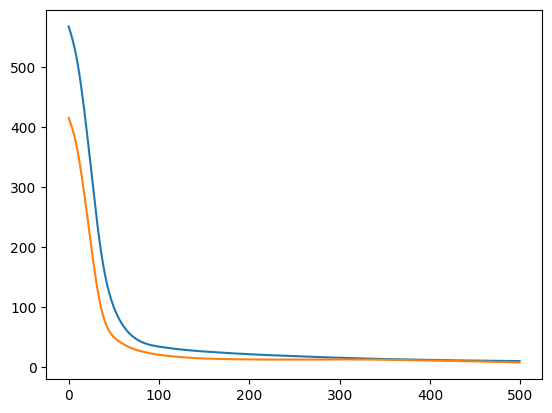

In [131]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [132]:
y_pred = model.predict(x_test_scaled)
y_pred.flatten()

4/4 [==============================] - 0s 3ms/step


array([ 8.928988 , 16.556498 , 21.25797  , 33.709793 , 24.459005 ,
       19.608181 , 26.191055 , 20.72022  , 19.172905 , 20.674786 ,
       20.407211 , 16.255838 , 15.827779 , 42.859913 , 19.520006 ,
       19.018927 , 27.193678 , 19.66831  , 17.183945 , 30.610987 ,
       11.385168 , 15.793212 , 20.816221 , 15.51541  , 23.967758 ,
       22.236237 , 29.921413 , 30.328022 , 10.738625 , 19.729513 ,
       20.827765 , 14.59251  , 30.933506 , 26.072872 , 15.986761 ,
        8.565595 , 14.063043 , 18.982018 , 19.08275  , 27.840967 ,
       28.2416   , 28.565887 , 15.1763115, 41.38941  , 30.275562 ,
       22.027115 , 27.609344 , 16.174265 , 22.765055 , 23.768852 ,
       35.57928  , 18.627811 , 12.090013 , 14.46497  , 34.52344  ,
       27.689743 , 13.988395 , 46.943405 , 30.704752 , 22.431849 ,
       24.605043 , 18.16446  , 14.9979   , 18.985771 , 24.02375  ,
       23.568018 , 13.824787 , 22.956871 , 13.765329 ,  6.9658065,
       30.7693   , 25.862877 , 22.524326 , 15.000127 , 25.8618

In [133]:
y_test

array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2, 18.6,
       14.5, 17.8, 50. , 20.8, 24.3, 24.2, 19.8, 19.1, 22.7, 12. , 10.2,
       20. , 18.5, 20.9, 23. , 27.5, 30.1,  9.5, 22. , 21.2, 14.1, 33.1,
       23.4, 20.1,  7.4, 15.4, 23.8, 20.1, 24.5, 33. , 28.4, 14.1, 46.7,
       32.5, 29.6, 28.4, 19.8, 20.2, 25. , 35.4, 20.3,  9.7, 14.5, 34.9,
       26.6,  7.2, 50. , 32.4, 21.6, 29.8, 13.1, 27.5, 21.2, 23.1, 21.9,
       13. , 23.2,  8.1,  5.6, 21.7, 29.6, 19.6,  7. , 26.4, 18.9, 20.9,
       28.1, 35.4, 10.2, 24.3, 43.1, 17.6, 15.4, 16.2, 27.1, 21.4, 21.5,
       22.4, 25. , 16.6, 18.6, 22. , 42.8, 35.1, 21.5, 36. , 21.9, 24.1,
       50. , 26.7, 25. ])

In [134]:
model.evaluate(x_test_scaled,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 20.8271


20.82709503173828

In [135]:
# mse= tf.keras.losses.MeanSquaredError()
# mse(y_test, y_pred).numpy()

In [136]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

20.827097757694965

In [137]:
x_test_scaled[0]

array([ 1.55369355, -0.48361547,  1.0283258 , -0.25683275,  1.03838067,
        0.23545815,  1.11048828, -0.93976936,  1.67588577,  1.5652875 ,
        0.78447637, -3.48459553,  2.25092074])

In [138]:
# Save the keras model

tf.keras.models.save_model(model,'output.h5')

In [139]:
# Load the keras model

new_model = tf.keras.models.load_model('output.h5')
new_model.predict(x_test_scaled[0].reshape(-1,13))

1/1 [==============================] - 0s 43ms/step


array([[8.928988]], dtype=float32)

In [140]:
# Neural Network wants 2 things to run the model

# h5 file stores both of them

# 1. Model parameters (Weights and Biases)
# 2. Model Architecture

In [141]:
model.layers[1].get_weights()

[array([[1.2714984],
        [1.4752994],
        [1.1792841],
        [1.1299733],
        [1.1623049],
        [1.9021748],
        [1.3235474],
        [0.7124976]], dtype=float32),
 array([0.81732136], dtype=float32)]

In [142]:
#KERAS BINARY CLASSIFICATION

In [143]:
from sklearn.datasets import make_moons
x,y= make_moons(noise=0.1,random_state=0)

In [144]:
import pandas as pd
df= pd.DataFrame(x)
df['y']=y
df.head()

,0,1,y
0,-0.053484,0.992582,0
1,1.819900,-0.175600,1
2,0.955357,0.059999,0
3,0.015581,0.110817,1
4,0.964549,-0.512765,1


In [145]:
df1 = df[df['y']==1]
df0 = df[df['y']==0]

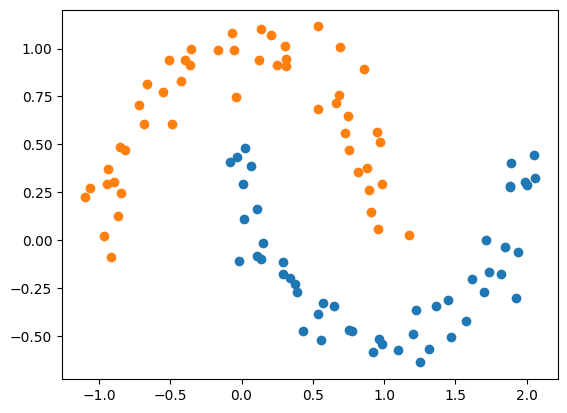

In [146]:
import matplotlib.pyplot as plt
plt.scatter(df1[0],df1[1])
plt.scatter(df0[0],df0[1])
plt.show()

In [147]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [148]:
x_train.shape

(67, 2)

In [149]:
x_test.shape

(33, 2)

In [150]:
import tensorflow as tf
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8,input_shape=x_train[0].shape,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [151]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 8)                 24        
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [152]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs=2000,validation_data=(x_test,y_test))

Epoch 1/2000
3/3 [==============================] - 1s 76ms/step - loss: 0.7874 - accuracy: 0.2836 - val_loss: 0.8171 - val_accuracy: 0.3030
Epoch 2/2000
3/3 [==============================] - 0s 18ms/step - loss: 0.7829 - accuracy: 0.2985 - val_loss: 0.8121 - val_accuracy: 0.3030
Epoch 3/2000
3/3 [==============================] - 0s 18ms/step - loss: 0.7792 - accuracy: 0.3134 - val_loss: 0.8074 - val_accuracy: 0.3030
Epoch 4/2000
3/3 [==============================] - 0s 16ms/step - loss: 0.7752 - accuracy: 0.3134 - val_loss: 0.8030 - val_accuracy: 0.3030
Epoch 5/2000
3/3 [==============================] - 0s 28ms/step - loss: 0.7714 - accuracy: 0.3134 - val_loss: 0.7985 - val_accuracy: 0.3030
Epoch 6/2000
3/3 [==============================] - 0s 15ms/step - loss: 0.7676 - accuracy: 0.3134 - val_loss: 0.7941 - val_accuracy: 0.3030
Epoch 7/2000
3/3 [==============================] - 0s 15ms/step - loss: 0.7641 - accuracy: 0.3284 - val_loss: 0.7896 - val_accuracy: 0.3030
Epoch 8/2000


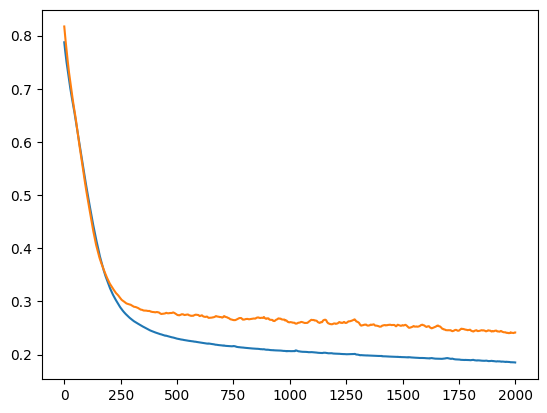

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

9600/9600 [==============================] - 12s 1ms/step


TypeError: ignored

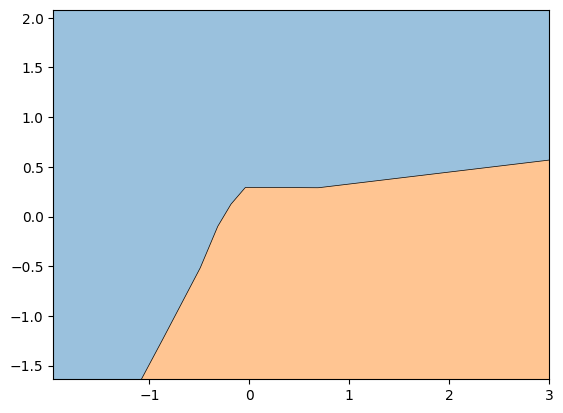

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_test,y_test,clf=model)

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(128,input_shape=x_train[0].shape,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer='adam',
              metrics=['accuracy'])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(x_train,y_train,epochs=2000,validation_data=(x_test,y_test),callbacks=[callback])

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_test,y_test,clf=model)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [ ]:
#Keras - Digit Recognizer Multi Class using Sparse Categorical

In [ ]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [ ]:
x_train.shape

In [ ]:
x_test.shape

In [ ]:
import matplotlib.pyplot as plt
i = 885
plt.imshow(x_train[i],cmap='gray')
plt.title(y_train[i])
plt.show()

In [ ]:

# Pixel range is from 0 to 255
# Grayscale image

In [ ]:
x_train.shape

In [ ]:
# Scale the data
x_train = x_train/255
x_test = x_test/255

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=x_train[0].shape))
model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer='adam',
              metrics=['accuracy'])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(x_train,y_train,epochs=20,validation_split=0.05,callbacks=[callback],batch_size=128)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [ ]:
model.evaluate(x_test,y_test)

In [ ]:
import numpy as np
op = model.predict(x_test)
y_pred = np.argmax(op,axis=-1)

In [ ]:
y_test

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)

In [ ]:
#Keras - Digit Recognizer Multi Class (Categorical Cross Entropy)

In [ ]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [ ]:
x_train.shape

In [ ]:
x_test.shape

In [ ]:
import matplotlib.pyplot as plt
i = 885
plt.imshow(x_train[i],cmap='gray')
plt.title(y_train[i])
plt.show()

In [ ]:
import pandas as pd
pd.Series(y_train).value_counts(normalize=True)


In [ ]:
y_train[0]

In [ ]:
y_train_cat = tf.keras.utils.to_categorical(y_train)
y_train_cat[0]

In [ ]:
y_test[0]

In [ ]:
y_test_cat = tf.keras.utils.to_categorical(y_test)
y_test_cat[0]

In [ ]:
x_train.shape

In [ ]:
# Scale the data
x_train = x_train/255
x_test = x_test/255

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=x_train[0].shape))
model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer='adam',
              metrics=['accuracy'])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(x_train,y_train_cat,epochs=20,validation_split=0.05,callbacks=[callback],batch_size=128)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [ ]:
model.evaluate(x_test,y_test_cat)

In [ ]:
import numpy as np
op = model.predict(x_test)
y_pred = np.argmax(op,axis=-1)
y_pred

In [ ]:
y_test

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)